In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-success">
<font color='blue'>
<br>Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
    <br>
    <br> <b>Цель проекта:</b> выявить определяющие успешность игры закономерности, чтобы в будущем можно было определять перспективные направления развития, составлять рекламные кампании и так далее. Выявить актуальный период  в результате исследования и построить прогноз на 2017 год.    
    </font>

In [64]:
data = pd.read_csv('/datasets/games.csv')

In [65]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Подготовка данных

In [66]:
data.columns = data.columns.str.lower()#приведем к нижнему регистру названия столбцов

In [67]:
data.head()#проверим результат преобразования

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [68]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбцах rating, critic_score, user_score и year_of_release имеются пропуски значений. Можно предположить. что пропуски в  critic_score, user_score связаны с тем, что игры не успели получить оценку критиков и пользователей. Так как заполнить пропуски в данных не представляется возможным, оставлю пропуски без изменений.

In [69]:
data[data.duplicated(subset=['name','platform'])]#проверим наличие не явных дубликатов

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


<div class="alert alert-success">
<font color='blue'>Не явные дубликаты в столбцах: 'name','platform', обрабатывать не вижу смысла т.к игра имеет одинаковое наименование, но год выпуска и платформа разные, т.е. это игры разные. </font>

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные в столбце year_of_release имеют вещественный тип данных, зааменим тип данных на цельночисленный.

In [71]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [72]:
data.year_of_release.unique()#проверим уникальные значения столбца 'year_of_release'

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [73]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В стлбце user_score среди уникальных значений имееется аббревиатура 'tbd' ее можно расшифровать как "Будет определено" или же неизвестное значение. Принято решение заменить значение на значение NaN и одновременно заменить тип данных с object на float - вещественный тип данных для дальнейшего агализа.

In [74]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

In [75]:
data['user_score'].unique()#проверим результат преобразований

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [76]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [77]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [78]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [79]:
data['rating'] = data['rating'].fillna('no rating')#заменим пропуск на условное обозначение так как данные далее нужны для анализа

<div class="alert alert-success">
<font color='blue'>
<br>Итоги по подготовке данных к анализу:
<br> *Заменил пропущенные значения (столбец 'rating'), для этого использовал условное обозначение "no rating" так как данные далее нужны для анализа влияния рейтинга ESRB на продажи в конкретном регионе. Что касается остальных пропусков, для их заполнения у нас недостаточно данных.
<br> *В стлбце user_score  аббревиатуру 'tbd' заменил на значение NaN и одновременно заменил  тип данных с object на float - вещественный тип данных.
<br> * В столбце 'year_of_release' так же заменил тип данных с float64 на цельночисленный тип данных, год выпуска будет использоваться на протяжении всего дальнейшего исследования.
<br> * Добавлен столбец'total_sales' - в нем объединил суммарные продажи во всех регионах.    
    </font>

###   Исследовательский анализ данных

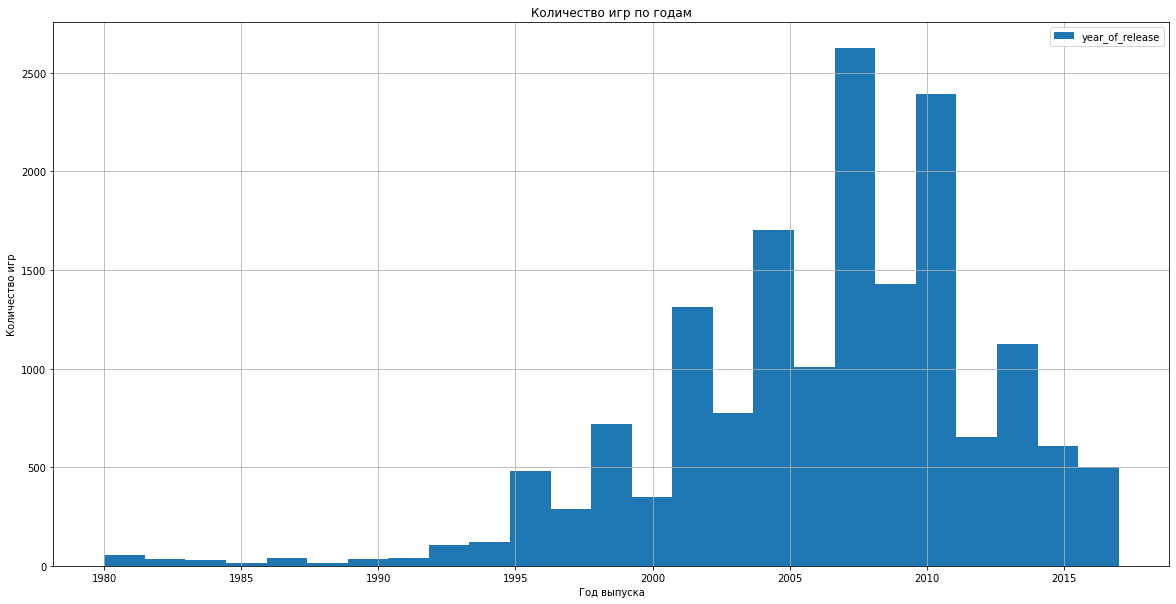

In [80]:
data.plot(y = 'year_of_release', bins = 25, grid=True, figsize=[20, 10], kind = 'hist', range = (1980,2017))
plt.title('Количество игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

<div class="alert alert-success">
<font color='blue'>Согласно данным на гистограме игры до 1995 года не имели массового характера, наиболее важными данными можно считать данные с 2005 года по 2009 год, когда наблюдался многократный рост продаж видеоигр.</font>

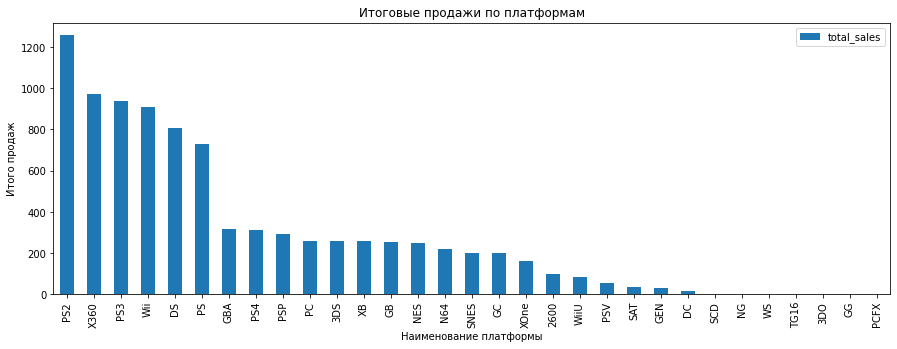

In [81]:
data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.sort_values(by = 'total_sales', ascending = False).\
plot(kind='bar', figsize=(15,5));
plt.title('Итоговые продажи по платформам')
plt.xlabel('Наименование платформы')
plt.ylabel('Итого продаж')
plt.show()

<div class="alert alert-success">
<font color='blue'>Первые 6 платформ (PS2, X360, PS3, Wii, DS, PS) по итоговым продажам во всех исследуемых регионах обгоняют остальные платформы. По сравнению с 7-й по рейтингу платформой - GBA разрыв более, чем в 2 раза. Для дальнейщего анализа сделаем выборку из топ-10 платформ по суммарным продажам во всех исследуемых регионам.</font>

In [82]:
top_10_platforms = data.query('platform == ["PS2","X360","PS3","Wii","DS","PS", "GBA", "PS4", "PSP", "PC"]')

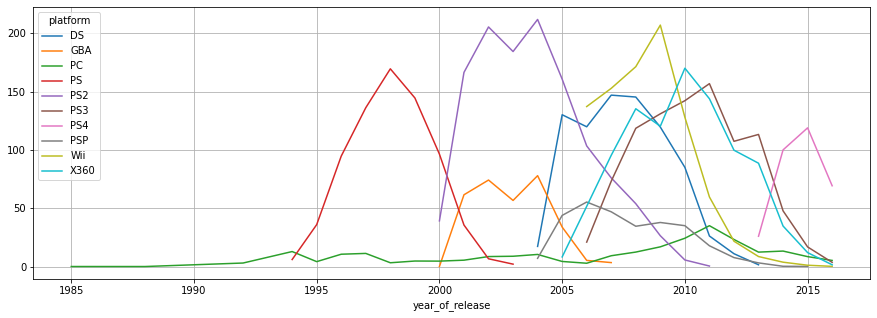

In [83]:
top_10_platforms.pivot_table(index = 'year_of_release',columns = 'platform', values = 'total_sales',aggfunc =  'sum')\
.plot(grid=True, figsize = (15,5))
plt.show()

<div class="alert alert-success">
<font color='blue'>Данный график наглядно показывает, что из рассмотренных отобранных топ-10 платформ по объемам продаж, каждая платформа имеет рост продаж, который имеет пиковое значение за которым идет снижение. Можно сделать вывод что со временем платформы теряют актуальность в связи с выходом более новых платформ. Можно выделить характерный срок за который появляются новые и исчезают старые платформы. Этот срок можно обозначить в пределах от 8 до 10 лет. Далее продажи платформ либо снижаются, либо изчезают вовсе.</font>

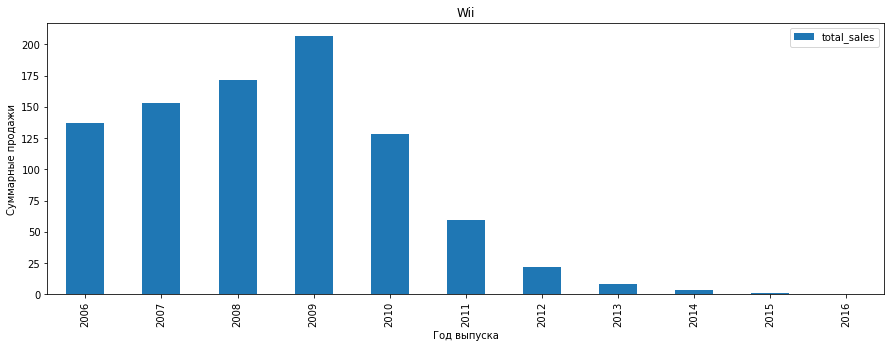

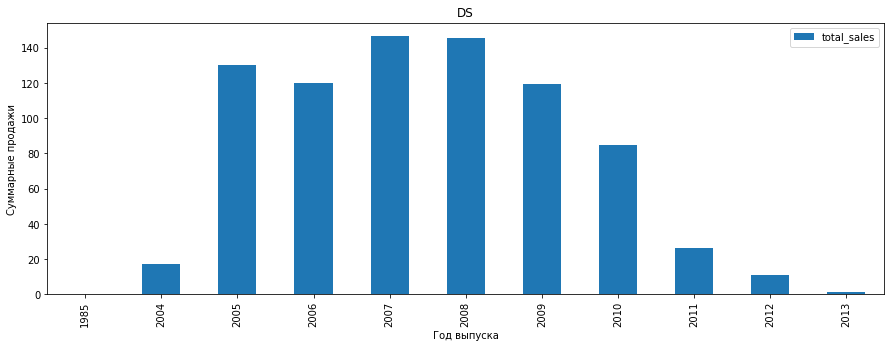

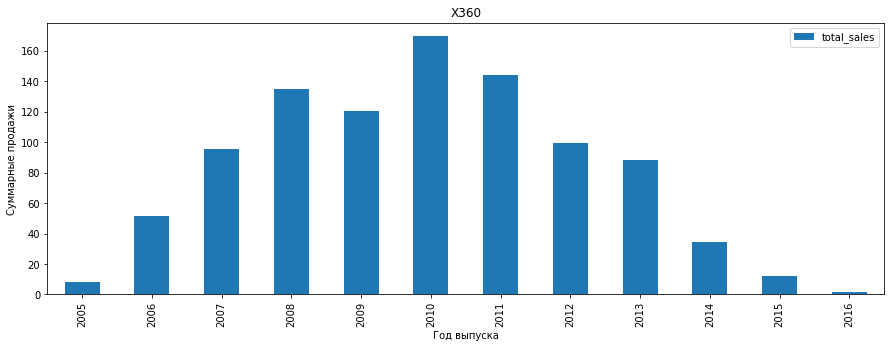

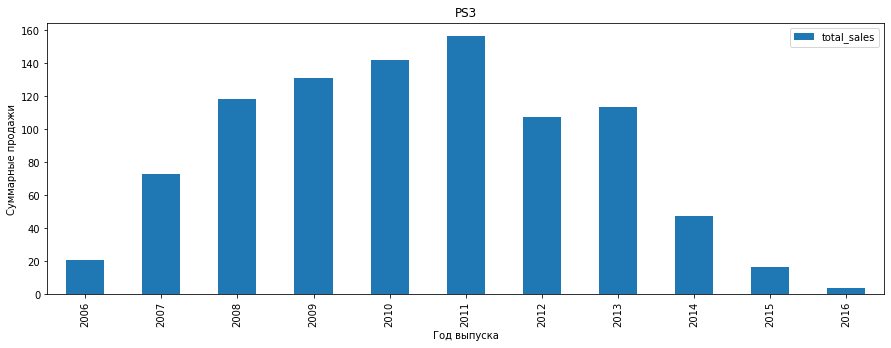

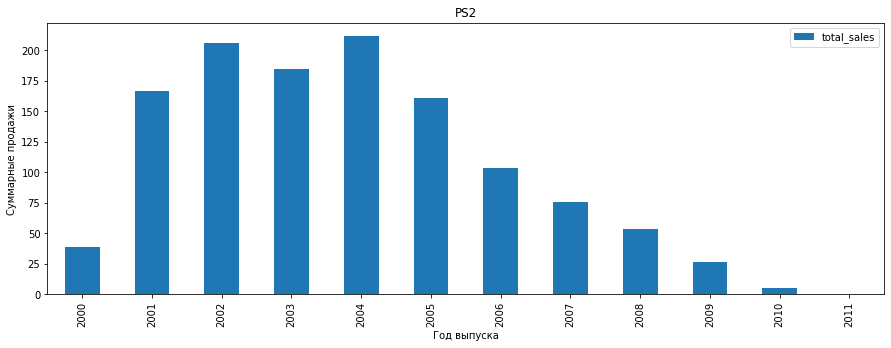

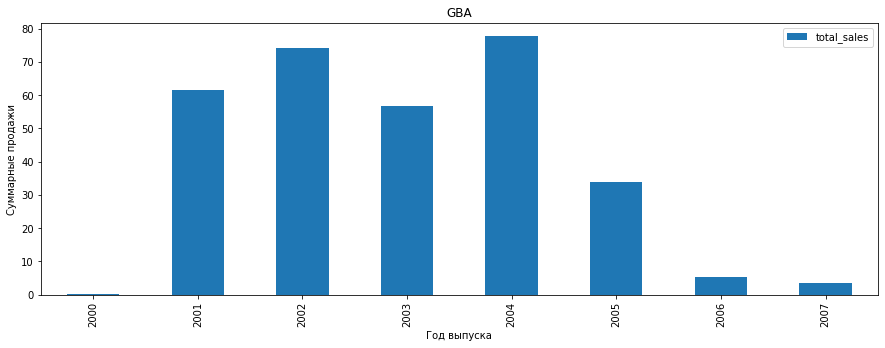

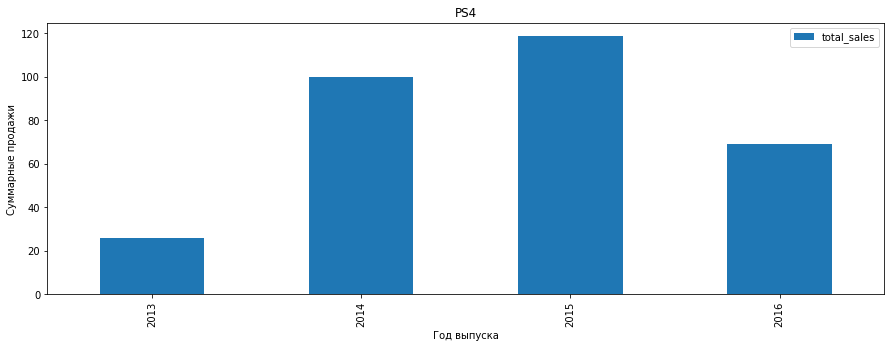

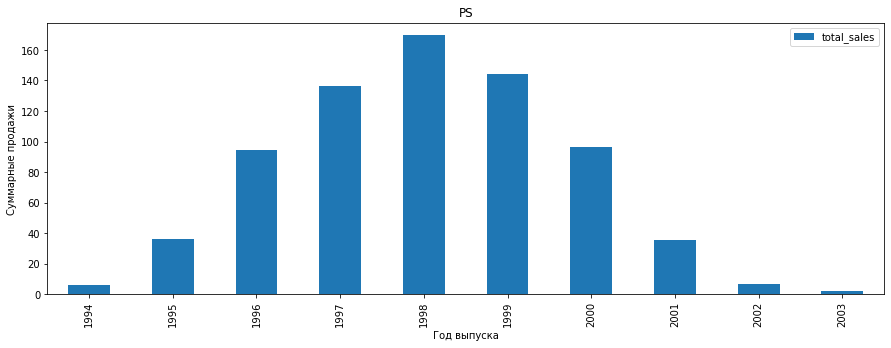

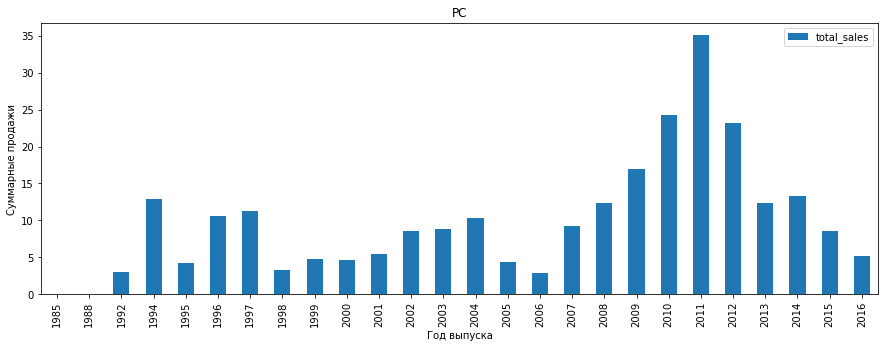

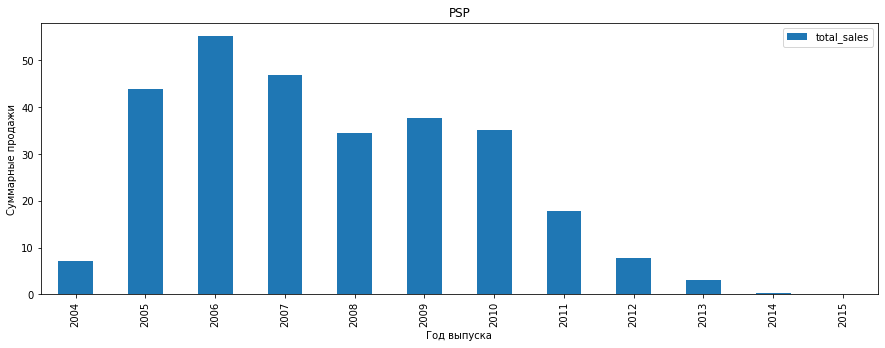

In [84]:
for platform in top_10_platforms['platform'].unique():
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
    .plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.show()

<div class="alert alert-success">
<font color='blue'>Графики по каждой платформе так же подтверждают что со временем платформы теряют актуальность в связи с выходом более новых платформ. Продажи платформ либо снижаются, либо изчезают вовсе.</font>

In [85]:
data_v_2 = data.query('year_of_release >= 2014')

<div class="alert alert-success">
<font color='blue'> Для дальнейщего анализа можно обозначить период c 2014 года и сделать срез.</font>

In [86]:
data_v_2.platform.unique()#проверим уникальные значения

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [110]:
data_v_2.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.sort_values(by='total_sales',ascending = False)#построим сводную таблицу общие продажи в порядке убывания по платформам

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


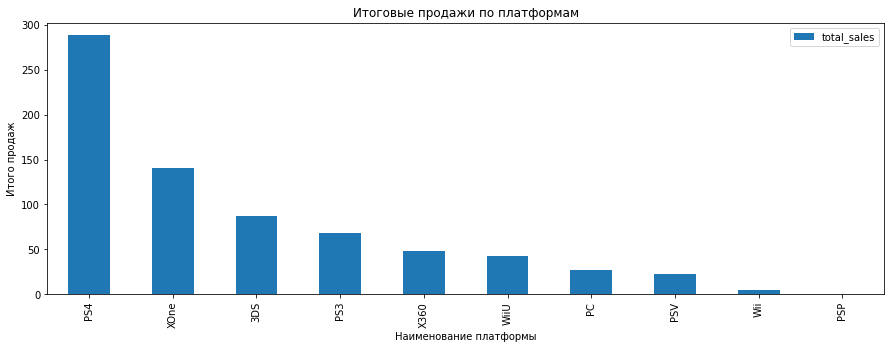

In [88]:
data_v_2.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').\
sort_values(by='total_sales',ascending = False).plot(kind='bar', figsize=(15,5));
plt.title('Итоговые продажи по платформам')
plt.xlabel('Наименование платформы')
plt.ylabel('Итого продаж')
plt.show()

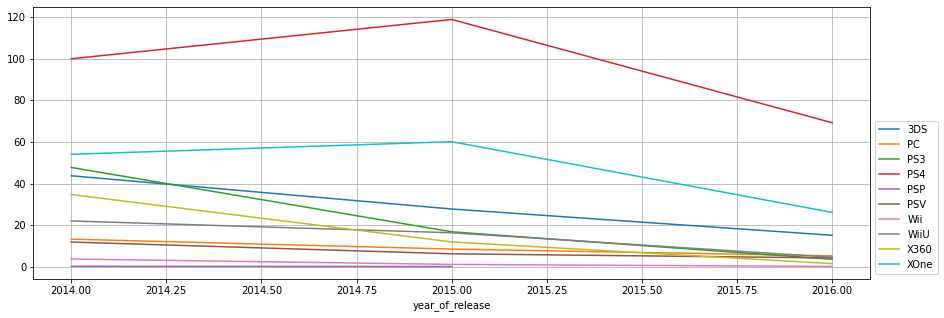

In [111]:
data_v_2.pivot_table(index = 'year_of_release', columns = 'platform',values = 'total_sales', aggfunc =  'sum')\
.plot(grid=True, figsize = (15,5))
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

<div class="alert alert-success">
<font color='blue'>По итоговому объему продаж, за рассматриваемый период в гистограмме, лидируют платформы - PS3 и X360. Эти платформы можно рассматривать как самые прибыльные, но стоить отметить, что продажи этих платформ, согласно граффика к 2016 году снизились и находяться на исторически минимальных значениях. Более высокий объем продаж за период с 2014-2016 гг. показывают платформы: PS4 и Xone. Наименее прибыльные платформы: PS2 и PSV.</font>

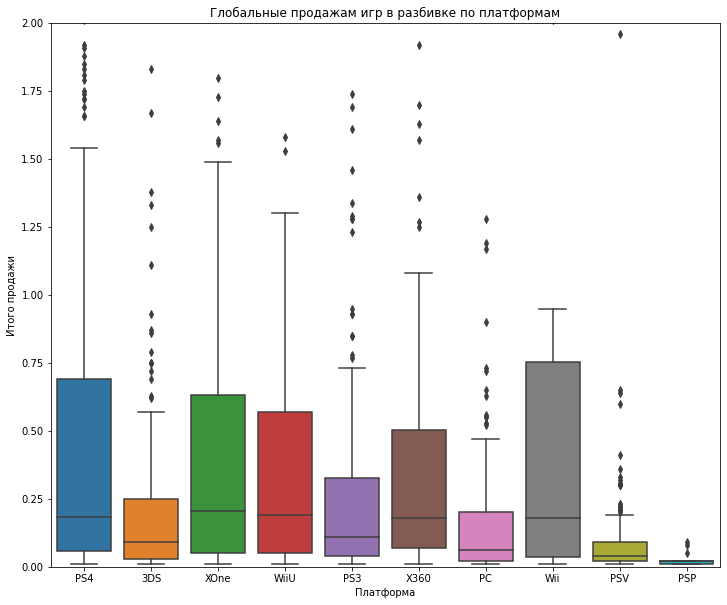

In [114]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data_v_2, x='platform', y='total_sales')
plt.ylim([0, 2])
plt.title('Глобальные продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Итого продажи')
plt.show()

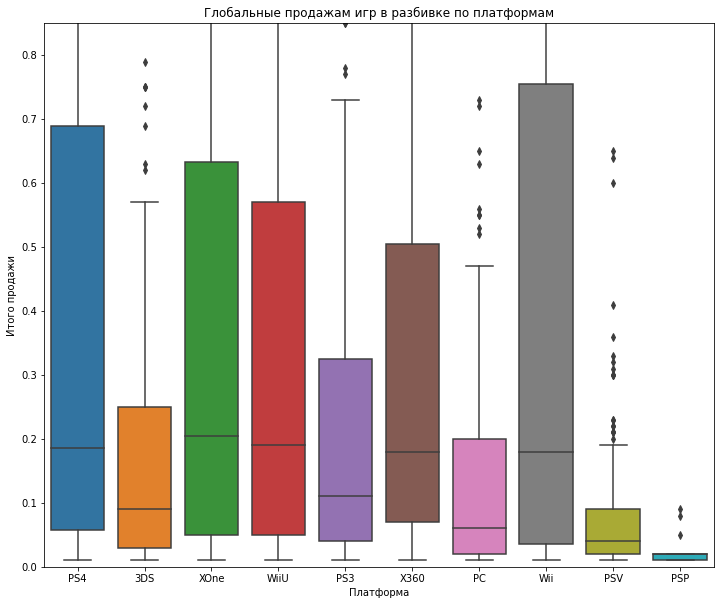

In [116]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data_v_2, x='platform', y='total_sales')
plt.ylim([0, 0.85])
plt.title('Глобальные продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Итого продажи')
plt.show()

<div class="alert alert-success">
<font color='blue'>Анализируя диаграмму размаха можно сделать вывод, что медианные заначения по итоговым продажам среди платформ находятся на сопоставимых уровнях, т.е среди лидеров продаж медиана примерно равна, так и среди менее продаваемых платформ медианные значения равны. Имеется выбросы среди данных. Наибольшее количество выбросов имеют платформы с более низким показателем продаж, т.е возможно имеется красковременный резкий прирост продаж.</font>

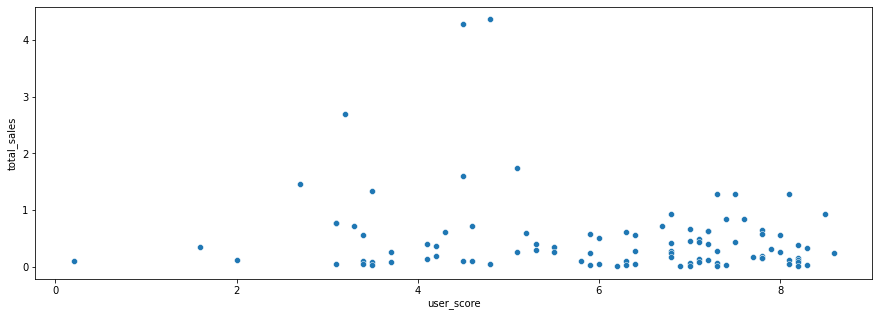

In [91]:
PS3 = data_v_2.query('platform == "PS3"')
plt.figure(figsize=(15,5))
sns.scatterplot(data = PS3, x = 'user_score',y = 'total_sales');

In [92]:
PS3['user_score'].corr(PS3['total_sales'])

-0.16676141347662118

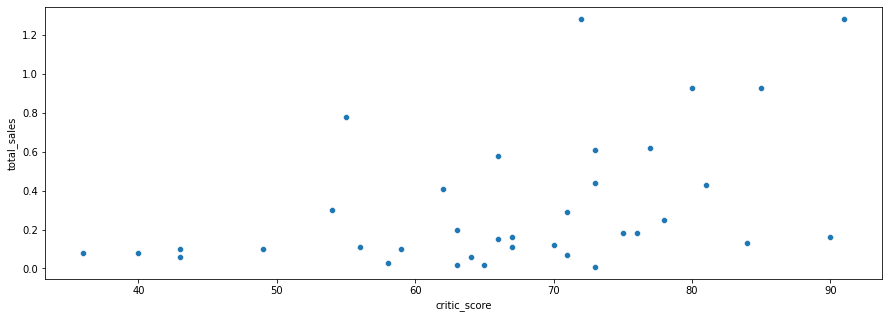

In [93]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = PS3, x = 'critic_score',y = 'total_sales');

In [94]:
PS3['critic_score'].corr(PS3['total_sales'])

0.44657460493190704

<div class="alert alert-success">
<font color='blue'>На продажи внутри одной платформы - PS3, имеющей наибольшеи суммарные продажи, отзывы пользователей и критиков не имеют сильной корреляционной зависимости к объему продаж. В случае оценок критиков корреляция выше, но прямая линейная связь между данными отсутствует.</font>

In [95]:
X360 = data_v_2.query('platform == "X360"')
print('Корреляция мужду оценками пользователей и общими продажами -', X360['user_score'].corr(X360['total_sales']))
print('Корреляция мужду оценками критиков и общими продажами -',X360['critic_score'].corr(X360['total_sales']))

Корреляция мужду оценками пользователей и общими продажами - -0.138444570945665
Корреляция мужду оценками критиков и общими продажами - 0.5257228356581523


In [96]:
PS4 = data_v_2.query('platform == "PS4"')
print('Корреляция мужду оценками пользователей и общими продажами -', PS4['user_score'].corr(PS4['total_sales']))
print('Корреляция мужду оценками критиков и общими продажами -',PS4['critic_score'].corr(PS4['total_sales']))

Корреляция мужду оценками пользователей и общими продажами - -0.040131589472697356
Корреляция мужду оценками критиков и общими продажами - 0.40266141068104083


<div class="alert alert-success">
<font color='blue'>Вышеизложенные выводы об отсутствии линейной связи между данными об оценках пользователей, критиков и объемом продаж, подтверждается и на других платформах</font>

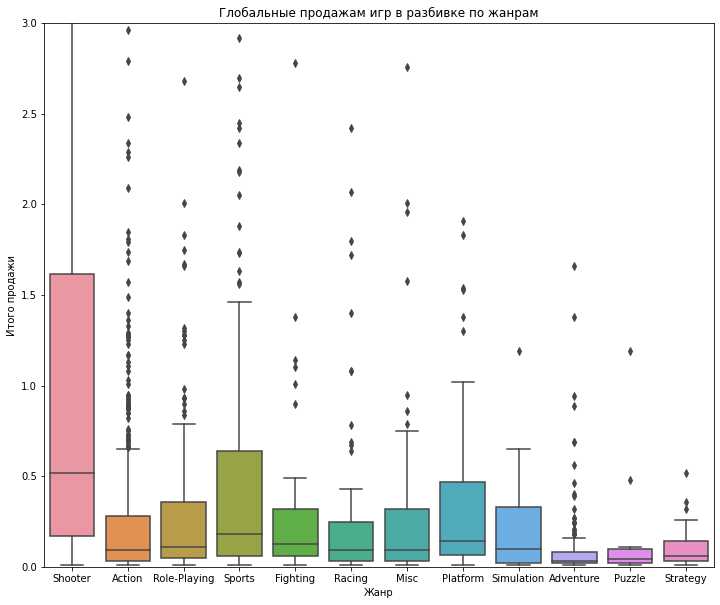

In [97]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data_v_2, x='genre', y='total_sales')
plt.ylim([0, 3])
plt.title('Глобальные продажам игр в разбивке по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Итого продажи')
plt.show()

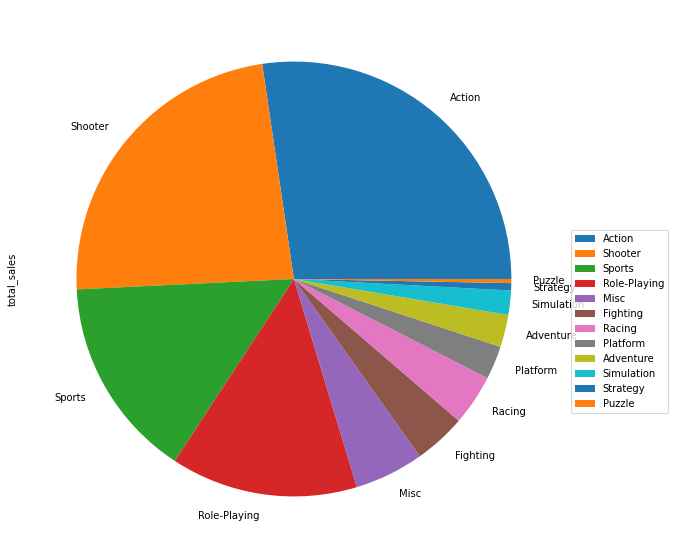

In [117]:
data_v_2.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')\
.sort_values(ascending=False, by = 'total_sales').plot(kind='pie', figsize=(10,10), y= 'total_sales')
plt.legend(bbox_to_anchor=(1, 0.6));


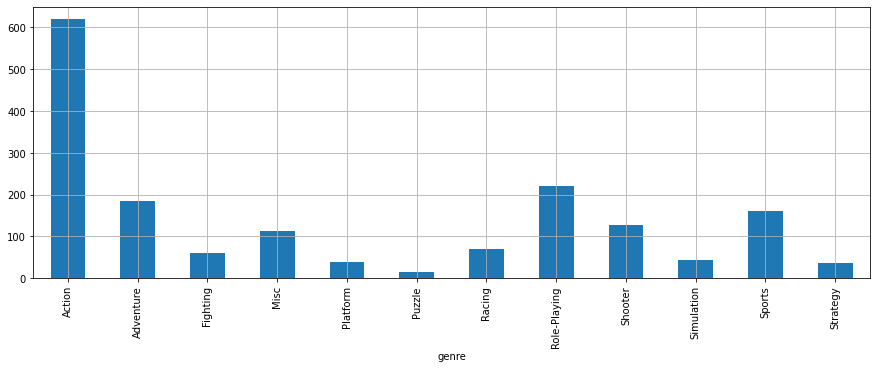

In [99]:
data_v_2.groupby('genre')['genre'].agg('count').plot(kind = 'bar', grid=True, figsize = (15,5));

<div class="alert alert-success">
<font color='blue'>Самым прибыльным жанром можно считать жанр "Action" и "Shooter". Самые низкие продажи у жанра "Puzzle" и "Strategy". Следует отметить, что жанр "Shooter" имеет самые высокие медианные значение продаж, что свидетельствует о стабильных показателях объемов продаж. </font>

### Портрет пользователя каждого региона

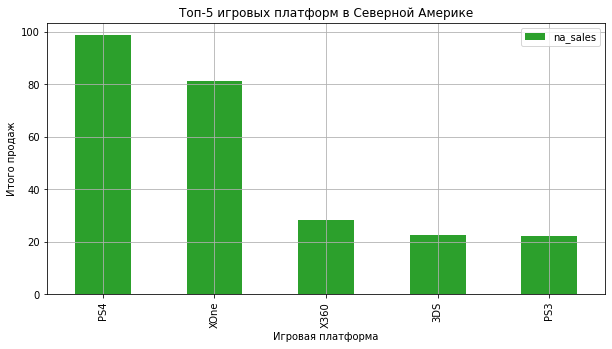

In [100]:
data_v_2.pivot_table(index = 'platform', values= 'na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False).head().\
plot(kind='bar',figsize=(10,5), grid=True, color='tab:green')
plt.title('Топ-5 игровых платформ в Северной Америке')
plt.xlabel('Игровая платформа')
plt.ylabel('Итого продаж')
plt.show()

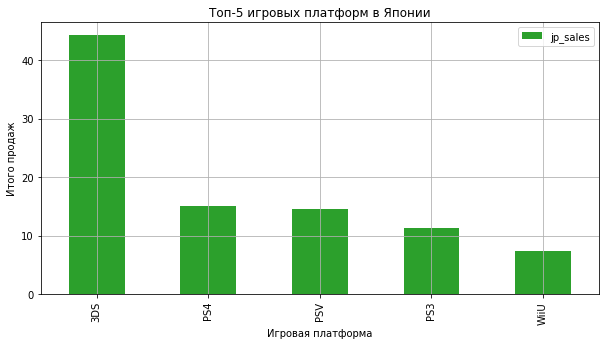

In [101]:
data_v_2.pivot_table(index = 'platform', values= 'jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False).head().\
plot(kind='bar',figsize=(10,5), grid=True, color='tab:green')
plt.title('Топ-5 игровых платформ в Японии')
plt.xlabel('Игровая платформа')
plt.ylabel('Итого продаж')
plt.show()

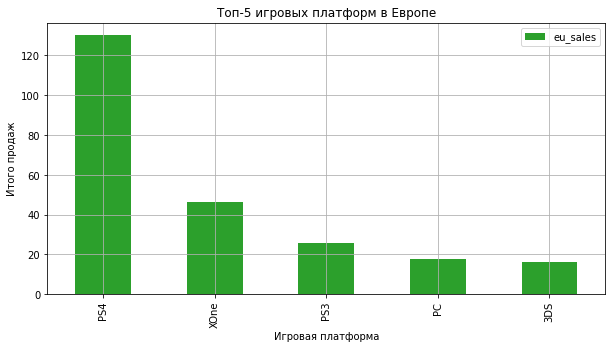

In [102]:
data_v_2.pivot_table(index = 'platform', values= 'eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False).head().\
plot(kind='bar',figsize=(10,5), grid=True, color='tab:green')
plt.title('Топ-5 игровых платформ в Европе')
plt.xlabel('Игровая платформа')
plt.ylabel('Итого продаж')
plt.show()

<div class="alert alert-success">
<font color='blue'>Анализируя графики можно отметить, что среди рассматриваемых регионов есть платформы которые пользуются одинаковой популярностью - PS4, с отличием лишь в том что в Европе и Северной Америке это платформа на первом месте по популярности,а в  Японии платформа занимает 2 место. В целом, из совокупности продаж, среди топ-5 платформ можно сделать вывод, что популярнее всего видеоигры в Северной Америке. XOne вторая по популярности платформа в Северной Америке и Европе. В целом предпочтения пользователей на некоторых платформах совпадают.</font>

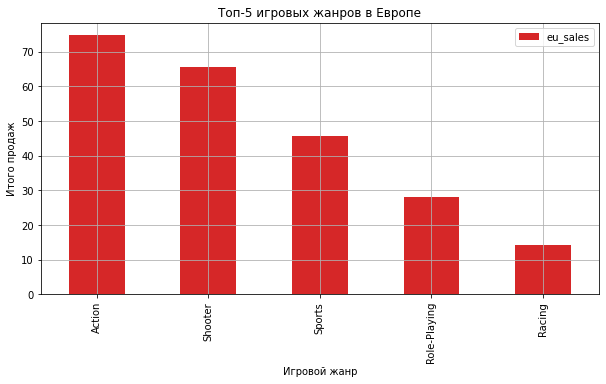

In [103]:
data_v_2.pivot_table(index = 'genre', values= 'eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False).head().\
plot(kind='bar',figsize=(10,5), grid=True, color='tab:red')
plt.title('Топ-5 игровых жанров в Европе')
plt.xlabel('Игровой жанр')
plt.ylabel('Итого продаж')
plt.show()

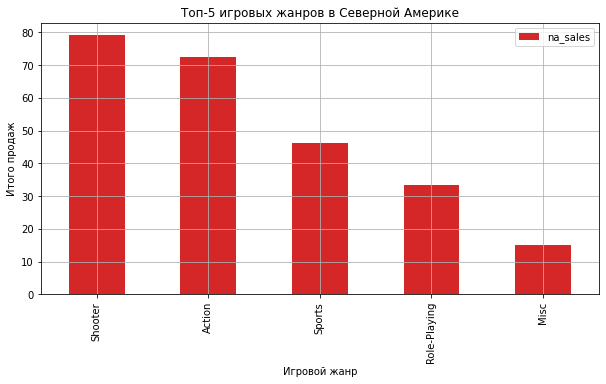

In [104]:
data_v_2.pivot_table(index = 'genre', values= 'na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False).head().\
plot(kind='bar',figsize=(10,5), grid=True, color='tab:red')
plt.title('Топ-5 игровых жанров в Северной Америке')
plt.xlabel('Игровой жанр')
plt.ylabel('Итого продаж')
plt.show()

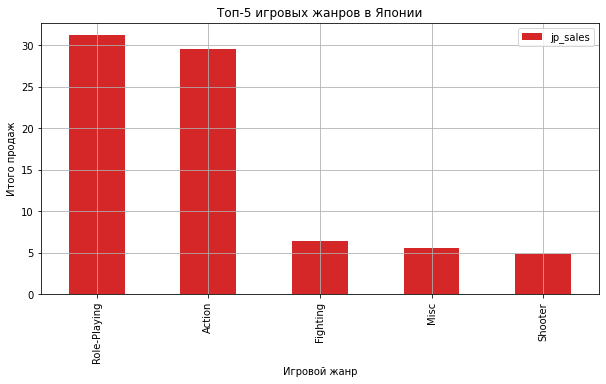

In [105]:
data_v_2.pivot_table(index = 'genre', values= 'jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False).head().\
plot(kind='bar',figsize=(10,5), grid=True, color='tab:red')
plt.title('Топ-5 игровых жанров в Японии')
plt.xlabel('Игровой жанр')
plt.ylabel('Итого продаж')
plt.show()

<div class="alert alert-success">
<font color='blue'>По графикам видно, что предпочтения в игровых жанрах пользователей Северной Америки и Европы практически полностью совпадают. В Японии жанр Action так же популярен, но приоритет все же пользователи отдают жанру Role-Playing.</font>

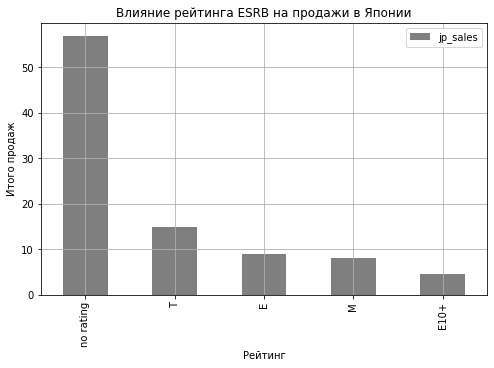

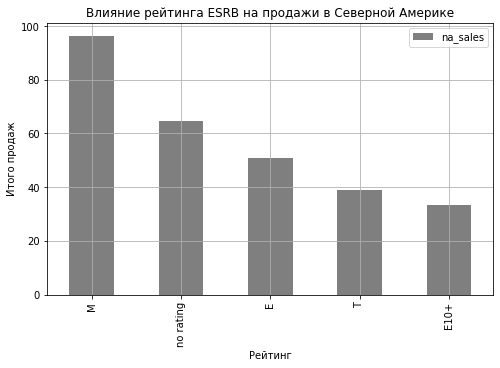

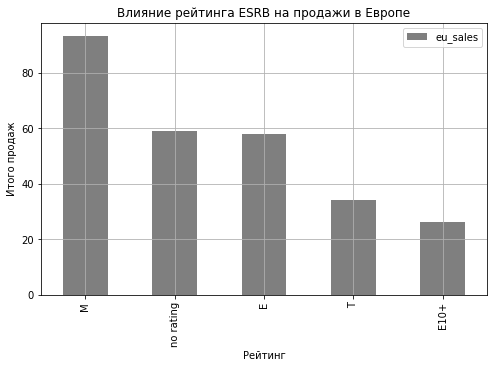

In [106]:
data_v_2.pivot_table(index = 'rating', values= 'jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False).head().\
plot(kind='bar',figsize=(8,5), grid=True, color='tab:grey')
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Итого продаж')
plt.show()
data_v_2.pivot_table(index = 'rating', values= 'na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False).head().\
plot(kind='bar',figsize=(8,5), grid=True, color='tab:grey')
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Итого продаж')
plt.show()
data_v_2.pivot_table(index = 'rating', values= 'eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False).head().\
plot(kind='bar',figsize=(8,5), grid=True, color='tab:grey')
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Итого продаж')
plt.show()

<div class="alert alert-success">
<font color='blue'>В Северной Америке и Европе ситуация по влиянию рейтинга на объем продаж идентична. Первую пятерку составляют игры рейтинга М, E, E10+,T, no rating. В Японии же ситуация обратная, в лидерах продаж игры без рейтинга. Отсюда вывод что рейтинг оказывает влияние на продажи но не во всех регионах.</font>

### Проверка гипотез

Сформулируем нулевую и альтернативную гипотезы:

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются;

In [107]:
xbox_one  = data_v_2[(data_v_2['platform'] == 'XOne')& (data_v_2['user_score'] > 0)]['user_score']
pc = data_v_2[(data_v_2['platform'] == 'PC')& (data_v_2['user_score'] > 0)]['user_score']
alpha = 0.05
results = st.ttest_ind(xbox_one, pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-success">
<font color='blue'>Так как нулевая гипотеза не отвергнута значит статистическо значимой разницы между средним пользовательским рейтингом Xbox One и PC нет.</font>

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
H1: Средние пользовательские рейтинги жанров Action и Sports разные

In [108]:
action = data_v_2[(data_v_2['genre'] == 'Action') &  (data_v_2['user_score'] > 0)]['user_score']
sports = data_v_2[(data_v_2['genre'] == 'Sports') &  (data_v_2['user_score'] > 0)]['user_score']
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


<div class="alert alert-success">
<font color='blue'>Так как нулевая гипотеза отвергнута значит средние пользовательские рейтинги жанров Action и Sports различаются и всвязи с этим  нет вероятности получить одинаковые средние рейнтинги по рассматриваемым жанрам игр.</font>

### Общий вывод

<div class="alert alert-success">
<font color='black'>    
<b><br>- Игры до 1995 года не имели массового характера, наиболее важными данными можно считать данные с 2005 года по 2009 год, когда наблюдался многократный рост продаж видеоигр.
Платформы (PS2, X360, PS3, Wii, DS, PS) по итоговым продажам во всех исследуемых регионах обгоняют остальные платформы. По сравнению с 7-й по рейтингу платформой - GBA разрыв более, чем в 2 раза. Из рассмотренных отобранных топ-10 платформ по объемам продаж, каждая платформа имеет рост продаж, который имеет пиковое значение за которым идет снижение. Можно сделать вывод что со временем платформы теряют актуальность в связи с выходом более новых платформ. Можно выделить характерный срок за который появляются новые и исчезают старые платформы. Этот срок можно обозначить в пределах от 8 до 10 лет. Далее продажи платформ либо снижаются, либо изчезают вовсе.
<br>- По принципу, что характерный срок за который появляются новые и исчезают старые платформы составляет 8-10 лет, для дальнейщего анализа можно обозначить период после 2010 года и сделать срез.По итоговому объему продаж, за рассматриваемый период в гистограмме, лидируют платформы - PS3 и X360. Эти платформы можно рассматривать как самые прибыльные, но стоить отметить, что продажи этих платформ, согласно граффика к 2016 году снизились и находяться на исторически минимальных значениях. Более высокий объем продаж за период с 2014-2016 гг. показывают платформы: PS4 и Xone. Наименее прибыльные платформы: PS2 и PSV.
<br>- Медианные заначения по итоговым продажам среди платформ находятся на сопоставимых уровнях, т.е среди лидеров продаж медиана примерно равна, так и среди менее продаваемых платформ медианные значения равны. Имеется выбросы среди данных. Наибольшее количество выбросов имеют платформы с более низким показателем продаж, т.е возможно имеется красковременный резкий прирост продаж.
<br>- Отзывы пользователей и критиков не имеют сильной корреляционной зависимости к объему продаж. В случае оценок критиков корреляция выше, но прямая линейная связь между данными отсутствует.
<br>- Самым прибыльным жанром можно считать жанр "Action" и "Shooter". Самые низкие продажи у жанра "Puzzle" и "Strategy". Следует отметить, что жанр "Shooter" имеет самые высокие медианные значение продаж, что свидетельствует о стабильных показателях объемов продаж.
<br>- Cреди рассматриваемых регионов есть платформы которые пользуются одинаковой популярностью - PS4, с отличием лишь в том что в Европе и Северной Америке это платформа на первом месте по популярности,а в  Японии платформа занимает 2 место. В целом, из совокупности продаж, среди топ-5 платформ можно сделать вывод, что популярнее всего видеоигры в Северной Америке. XOne вторая по популярности платформа в Северной Америке и Европе. В целом предпочтения пользователей на некоторых платформах совпадают.
<br>- Предпочтения в игровых жанрах пользователей Северной Америки и Европы практически полностью совпадают. В Японии жанр Action так же популярен, но приоритет все же пользователи отдают жанру Role-Playing.
<br>- В Северной Америке и Европе ситуация по влиянию рейтинга на объем продаж идентична. Первую пятерку составляют игры рейтинга М, E, E10+,T, no rating. В Японии же ситуация обратная, в лидерах продаж игры без рейтинга. Отсюда вывод что рейтинг оказывает влияние на продажи но не во всех регионах.
<br>- Статистическо значимой разницы между средним пользовательским рейтингом Xbox One и PC нет. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.Так как нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые, отвергнута, значит средние пользовательские рейтинги жанров Action и Sports различаются и всвязи с этим  нет вероятности получить одинаковые средние рейнтинги по рассматриваемым жанрам игр.</b>
 <br>-Для прогноза будущих продаж можно предположить, что  большую часть прибыли будут приносить игры жанра "Action" и "Shooter", для платформы PS4 и XOne с рейтингом М от ESRB.Это характерно для рынка Европы и Северной Америки. Для Японии будут предпочтительны  игры жанра Role-Playing и Action для платформы PS4 и 3DS. Рейтинг от ESRB для данного рынка значения не имеет.
</font>.
</div>.